## Question 1:
##### Generate a dataset using numpy random as I had shown in the 1st class of this week. Train a linear regression model  using |x-xhat|3 as your loss function and a polynomial regression model using |x-xhat|7 as your loss function. (Note that you will need to derive the gradient descent algorithms for these functions yourselves). You are allowed to use only numpy, pandas and Matplotlib. Then train a linear regression model using the sklearn library on the same dataset. At last, plot the dataset and curves obtained from all models in the same figure.

Linear Regression Coefficients (|x - xhat|^3):
w: [1.57298337]
b: [-0.0281673]

Polynomial Regression Coefficients (|x - xhat|^7):
u: 1.0
v: 0.5
w: 0.5

Linear Regression Coefficients (scikit-learn):
Intercept: 0.5281232570298772
Coefficient: 1.1296312687960457


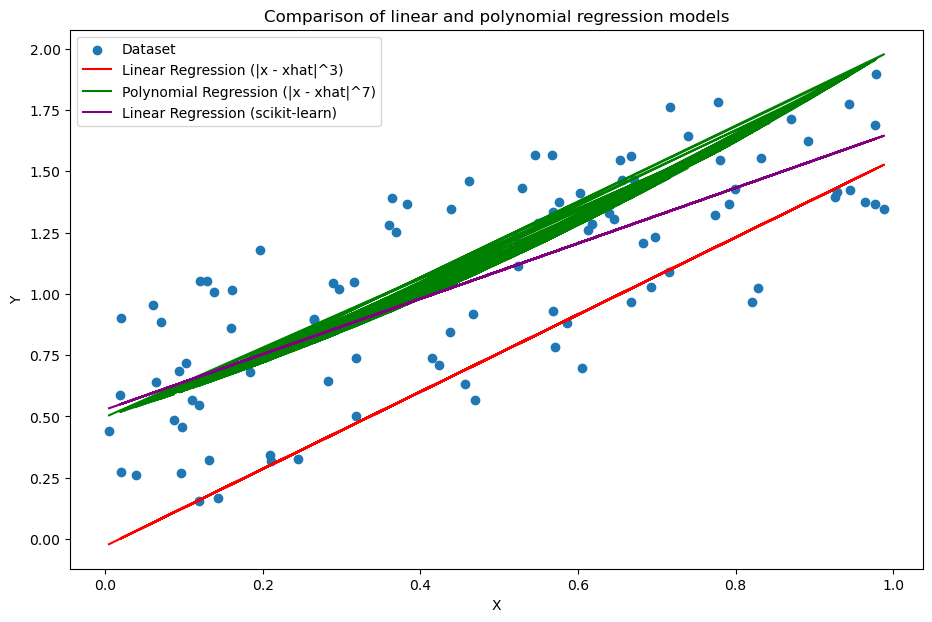

In [15]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generating a random dataset
np.random.seed(0)
X = np.random.rand(100)
Y = 0.2 * X**2 + X + np.random.rand(100)

# Linear Regression Functions

def hypothesis_linear(w, x, b):
    """
    Linear regression hypothesis function.

    Args:
    - w (float): Coefficient for the linear term.
    - x (numpy array): Input data.
    - b (float): Intercept term.

    Returns:
    - numpy array: Predicted values.
    """
    return w * x + b

def loss_function_linear(Y, h):
    """
    Loss function for linear regression.

    Args:
    - Y (numpy array): True values.
    - h (numpy array): Predicted values.

    Returns:
    - float: Mean absolute cubed error.
    """
    return np.mean(np.abs(Y - h) ** 3)

def gradient_descent_linear(w, b, X, Y, alpha):
    """
    Gradient descent optimization for linear regression.

    Args:
    - w (float): Initial coefficient for the linear term.
    - b (float): Initial intercept term.
    - X (numpy array): Input data.
    - Y (numpy array): True values.
    - alpha (float): Learning rate.

    Returns:
    - float: Updated coefficient for the linear term.
    - float: Updated intercept term.
    """
    h = hypothesis_linear(w, X, b)
    dw = -3 * np.sum(X * (Y - h) ** 2 * np.sign(Y - h))
    db = -3 * np.sum((Y - h) ** 2 * np.sign(Y - h))
    w = w - alpha * dw
    b = b - alpha * db
    return w, b

# Setting hyperparameters for linear regression
epoch_linear = 5000000
alpha_linear = 0.000000001
w_linear = np.random.randn(1)
b_linear = np.random.randn(1)

# Running gradient descent for linear regression
for i in range(epoch_linear):
    w_linear, b_linear = gradient_descent_linear(w_linear, b_linear, X, Y, alpha_linear)

# Polynomial Regression Functions

def hypothesis_poly(u, v, w, x):
    """
    Polynomial regression hypothesis function.

    Args:
    - u (float): Coefficient for the linear term.
    - v (float): Coefficient for the quadratic term.
    - w (float): Intercept term.
    - x (numpy array): Input data.

    Returns:
    - numpy array: Predicted values.
    """
    return u * x + v * x**2 + w

def loss_function_poly(Y, h):
    """
    Loss function for polynomial regression.

    Args:
    - Y (numpy array): True values.
    - h (numpy array): Predicted values.

    Returns:
    - float: Mean absolute seventh power error.
    """
    return np.mean(np.abs(Y - h) ** 7)

def gradient_descent_poly(u, v, w, X, Y, alpha):
    """
    Gradient descent optimization for polynomial regression.

    Args:
    - u (float): Initial coefficient for the linear term.
    - v (float): Initial coefficient for the quadratic term.
    - w (float): Initial intercept term.
    - X (numpy array): Input data.
    - Y (numpy array): True values.
    - alpha (float): Learning rate.

    Returns:
    - float: Updated coefficient for the linear term.
    - float: Updated coefficient for the quadratic term.
    - float: Updated intercept term.
    """
    h = hypothesis_poly(u, v, w, X)
    du = -7 * np.sum(X * (Y - h) ** 6 * np.sign(Y - h))
    dv = -7 * np.sum((Y - h) ** 6 * X**2 * np.sign(Y - h))
    dw = -7 * np.sum((Y - h) ** 6 * np.sign(Y - h))
    u = u - alpha * du
    v = v - alpha * dv
    w = w - alpha * dw
    return u, v, w

# Setting hyperparameters for polynomial regression
epoch_poly = 2
alpha_poly = 0.00000000000000000000000000000001

u_poly, v_poly, w_poly = 1, 0.5, 0.5

# Running gradient descent for polynomial regression
for i in range(epoch_poly):
    u_poly, v_poly, w_poly = gradient_descent_poly(u_poly, v_poly, w_poly, X, Y, alpha_poly)

# Linear Regression using scikit-learn

X_reshaped = X.reshape(-1, 1)
model_sklearn = LinearRegression()
model_sklearn.fit(X_reshaped, Y)

# Printing the coefficients for each model
print("Linear Regression Coefficients (|x - xhat|^3):")
print("w:", w_linear)
print("b:", b_linear)

print("\nPolynomial Regression Coefficients (|x - xhat|^7):")
print("u:", u_poly)
print("v:", v_poly)
print("w:", w_poly)

print("\nLinear Regression Coefficients (scikit-learn):")
print("Intercept:", model_sklearn.intercept_)
print("Coefficient:", model_sklearn.coef_[0])

# Plotting the results
plt.figure(figsize=(11,7)),
plt.scatter(X, Y, label='Dataset')
plt.plot(X, hypothesis_linear(w_linear, X, b_linear), label='Linear Regression (|x - xhat|^3)', color='red')
plt.plot(X, hypothesis_poly(u_poly, v_poly, w_poly, X), label='Polynomial Regression (|x - xhat|^7)', color='green')
plt.plot(X, model_sklearn.predict(X_reshaped), label='Linear Regression (scikit-learn)', color='purple')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of linear and polynomial regression models')
plt.legend()
plt.show()
